
# Project: Investigate a Dataset (TMDB movies dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis
#Question that can analyised from this data set

>Q1-Genres which had largest number of Movies

>Q2-does budget consider as a good aspect to achive high revenue 

>Q3-Genres with most earned revenue.

>Q4-Movies which had most and least profit.

>Q5- which year had the most no.of movies produced.




In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> After observing the dataset and proposed questions for the analysis, I will load the data, clean it, and prepare it for analysis.



### General Properties
> Dataset chosen for analysis: TMDB movies
This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.I'll ask questions related to genres and popularity.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_df = pd.read_csv('tmdb-movies.csv')

In [4]:
print(movie_df.shape)

(10866, 21)


In [5]:
movie_df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [6]:
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
> The database contains information about movies, including revenue, budget, Genres, release_date and Original_title



# The Data Structure

>I checked the database and found missing values, and datatypes. I cleaned the database. There were unecessary columns with missing data, and changed som columns' datatypes. The columns 'genres' and 'production_companies' contained multiple values so i need to split it so that i can use it to analyse my data.

#I removed the columns cast, homepage, tagline, keywords, cast, overview and imdb id because they won't be so useful in Analysis process.

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
movie_df= movie_df.drop(columns = ['homepage', 'cast', 'tagline','overview','imdb_id','keywords'])

In [9]:
movie_df.head(2)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


I converted release_date from string to date datatype.

In [10]:
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

I removed the Null value raws

In [11]:
columns = ['director', 'genres','production_companies']
movie_df.dropna(subset = columns, how='any', inplace=True)

I replaced the null data in "budget" and "revenue" with Mean 

In [12]:
movie_df['budget'] = movie_df['budget'].replace(0,movie_df['budget'].mean())

movie_df['revenue'] = movie_df['revenue'].replace(0,movie_df['revenue'].mean())

In [13]:
movie_df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

>check if there is any dublicates

In [14]:
sum(movie_df.duplicated())

1

>We will remove duplicate rows entirely from the dataset.

In [15]:
movie_df.drop_duplicates(inplace=True)

# Now I'm visualizing the data so that i can understand it's distributions


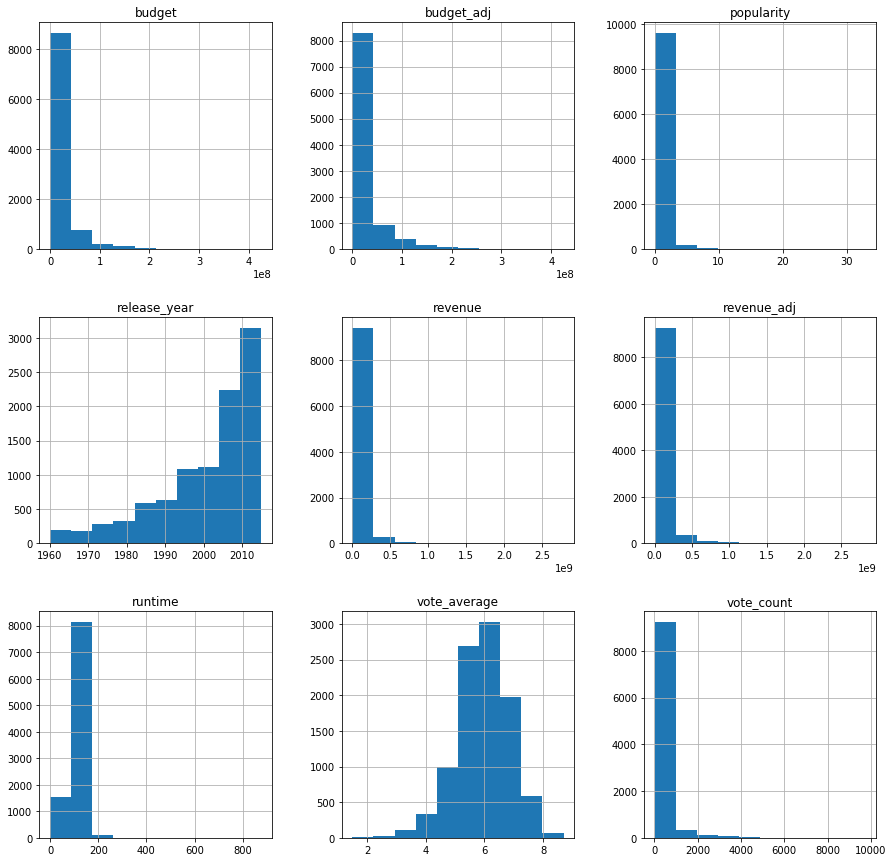

In [16]:
movie_df.drop(['id'], axis=1).hist(figsize=( 15,15));

>The column 'genres' has multiple value in the same row, so I decided to remove the values after the first '|' sign to get better grouping for analysis.

In [17]:
movie_df['genres'] = movie_df['genres'].apply(lambda x: x.split("|")[0])

<a id='eda'></a>
## Exploratory Data Analysis

> As I cleaned my dataset Now I'll analyze it. First I will Start with genres and it's relation With other Variables.







### Research Question 1 (Genres which had largest number of Movies)

In [18]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
movie_df_genre= movie_df.groupby(['genres']).count()['id'].sort_values(ascending=False)

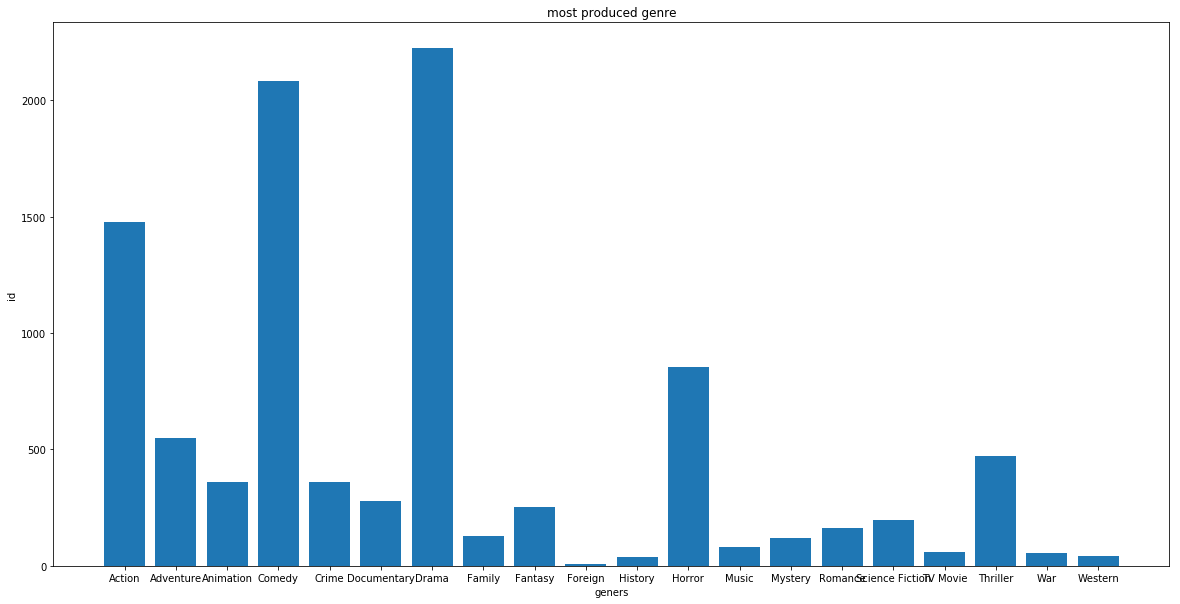

In [19]:
plt.subplots(figsize=(20, 10))
plt.bar(movie_df_genre.index, movie_df_genre)
plt.title('most produced genre')
plt.xlabel('geners')
plt.ylabel('id');

>As we can see here Darama Had the highest Number of produced Movies and Comedy Came Second.

# Research Question 2 (does budget consider as a good aspect to achive high revenue)

>now i'm going to explore if there is a relation between increasing the movie's budget and it's revenue

In [20]:
profitable_movies = movie_df.sort_values(by=['revenue'], ascending = False).head(200)
budget = profitable_movies['budget']
revenue = profitable_movies['revenue']

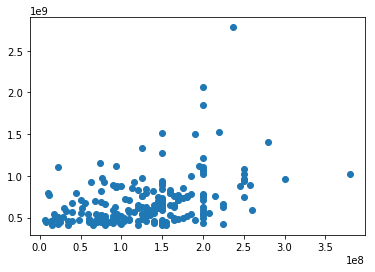

In [21]:
plt.scatter(budget, revenue)
plt.show()

>as we can see here there's no dirct relation between increasing the budget and the revenue so that the producers have to be carful with producing movies

# Research Question 3  (Genres with most earned revenue)

In [22]:
genre_df_revenue= movie_df.groupby(['genres']).mean()['revenue'].sort_values(ascending=False)

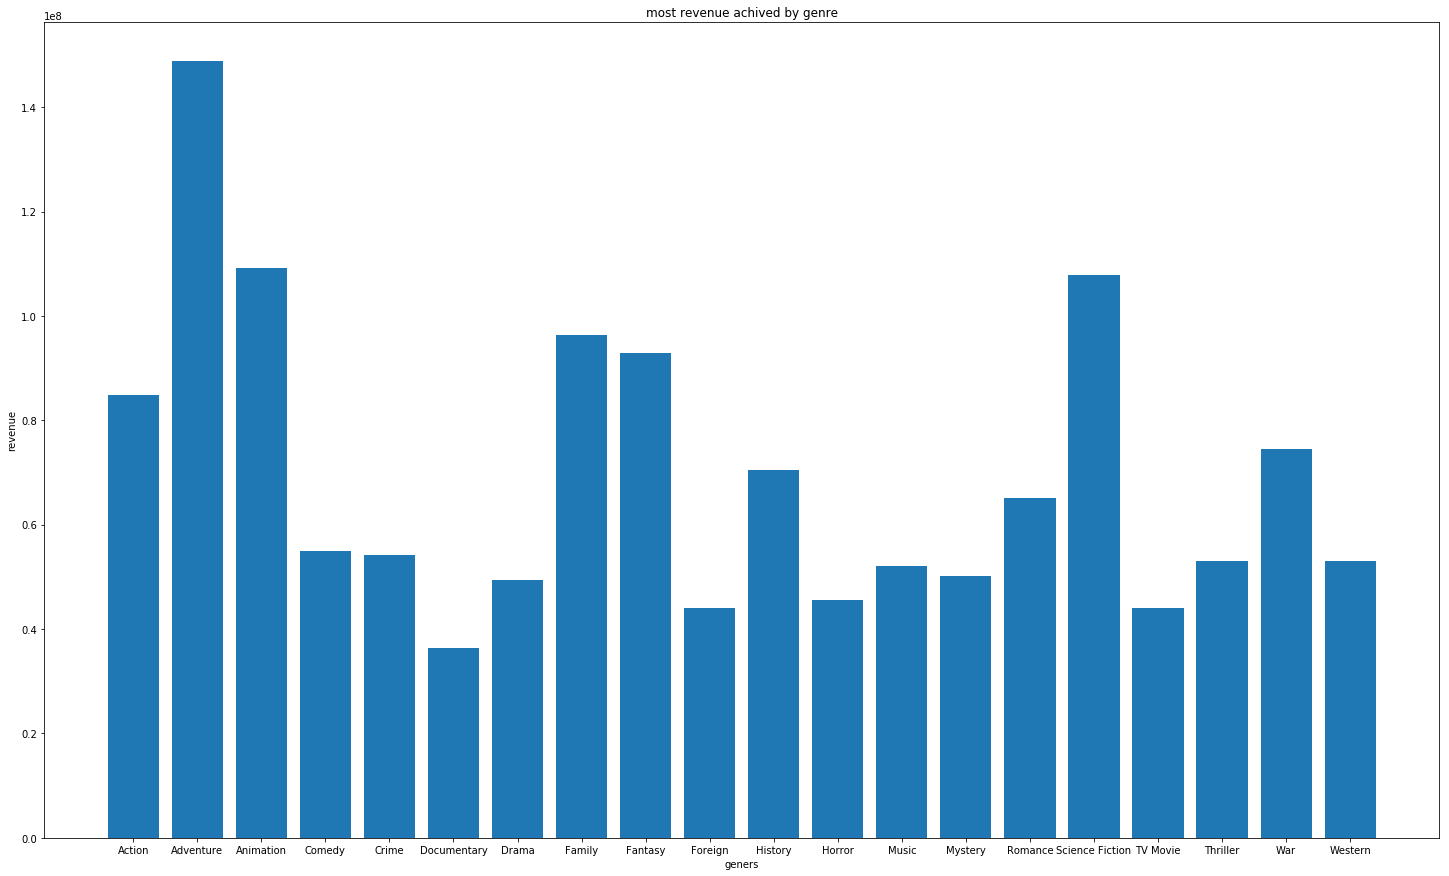

In [23]:
plt.subplots(figsize=(25, 15))
plt.bar(genre_df_revenue.index, genre_df_revenue)
plt.title('most revenue achived by genre')
plt.xlabel('geners')
plt.ylabel('revenue');

>as we can see here Adventure Movie got Most Earned revenue then Animation and Scince-Fiction 

# Research Question 4  (Movies which had most and least profit)

>in this question i will show you the most earned profit Movies and the least Earned Profit Movies

>First We need to add Profit Column to my dataset

In [24]:
movie_df.insert(2,'profit',movie_df['revenue']-movie_df['budget'])
movie_df.head(2)

,id,popularity,profit,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,2.284364e+08,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


Now I'm going to calculate the highest profit earned movie and the lowest one

In [25]:
movie_top5_df = movie_df.loc[movie_df.sort_values(by='profit', ascending=False)[1:6].index]

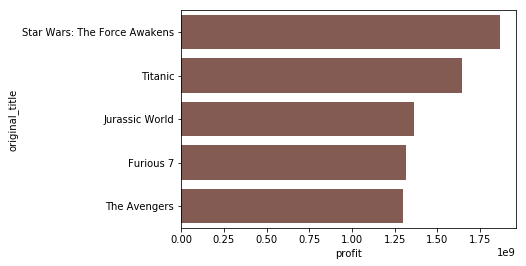

In [26]:
base_color = sns.color_palette()[5]
sns.barplot(data=movie_top5_df, x='profit', y='original_title', color=base_color)
sns.title = ('movie_top10_df')

>As we can see here these five Movies got the highest earned profit after avater movie. as we can see here the movie industry has improved so much that alot of movies got very high profit like Avatar 

In [27]:
movie_least5_df = movie_df.loc[movie_df.sort_values(by='profit', ascending=True)[-9806:-9801].index]

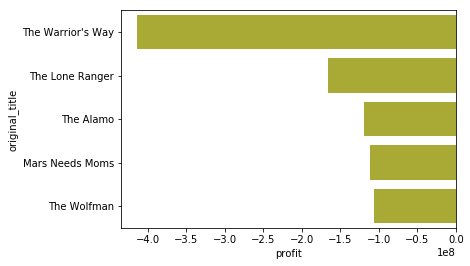

In [28]:
base_color = sns.color_palette()[8]
sns.barplot(data=movie_least5_df, x='profit', y='original_title', color=base_color)
sns.title = ('movie_least5_df')

>as we can see here these five movies suffered from a great loss as the producers spent so much money on the movies budget and they did'nt got enough revenue, but still thier loss is not comparable to the the Warrior's Way movie that got the lowest revenue and the highest loss

# Research Question 5  (which year had the most no.of movies produced)

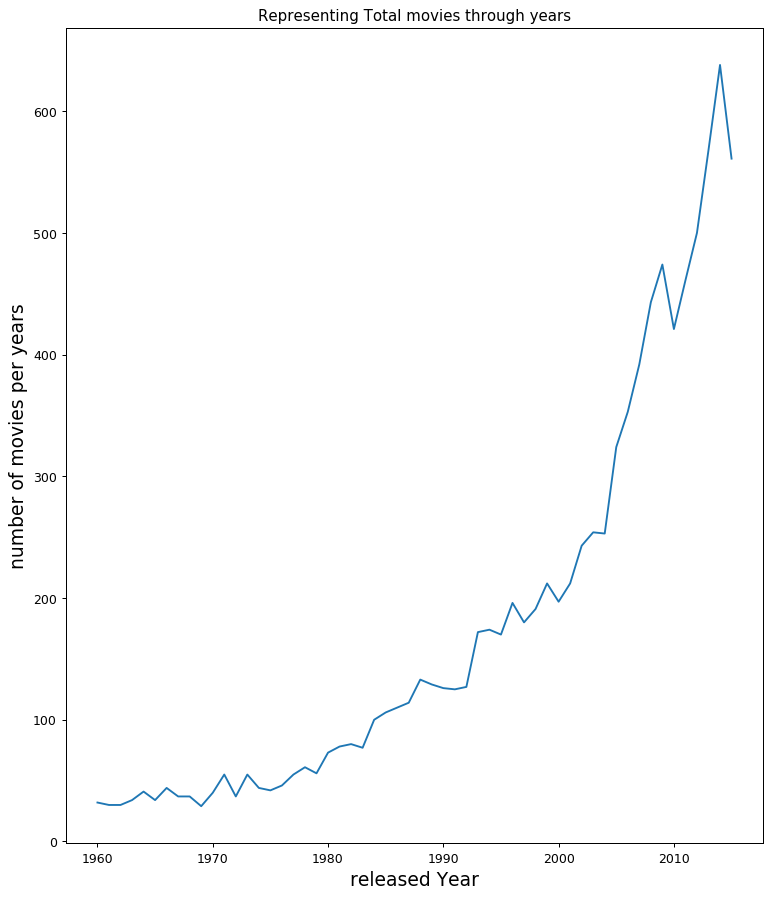

In [29]:
movies_per_year = movie_df.groupby('release_year')['original_title'].count()


plt.figure(figsize=(10,12), dpi = 90)


plt.xlabel('released Year', fontsize = 15)

plt.ylabel('number of movies per years', fontsize = 15)

plt.title('Representing Total movies through years')


plt.plot(movies_per_year)


plt.show()

>as we can see here Movie proudction industry reached it's peak after 2010

<a id='conclusions'></a>
## Conclusions

> In this project we answered some questions to analyise the Movie data we have and the result was Impressive.
> we saw earlier most produced Movies were Darma but movies With high revenue was the adventure genre. so it would be logic to find many production companies prefer to make adventure movies with high budget as they know that the profit would be worthy.
>we also saw that increasing moive budget is not neccessary to be good aspect to acheive high revenue so the producers have to be carful

>I assume that movie production industry has reached that level after 2010 because of the media influnce and the improvment that happened in advertising field.

> imitations: This analysis was done considering various number of voting in each movies so that we can't use vote_count or Vote_rate to compare between movies or genre.

>also budget_adj and revenue_adj are useless in my opnion as we don't know what aspects that made the movie's budget higher that expected or what made the movie earn revenue more or less than expected


In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255